<a href="https://colab.research.google.com/github/ch00226855/CMP414765Spring2021/blob/main/Week12_NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 12 
# Introduction to Neural Networks

Slides can be found [here](https://drive.google.com/file/d/1Ae5ancx-CW1eah51cNgKzfu87VDUTK_n/view?usp=sharing)

**Training large neural networks requires a lot of calculation.** Please turn on GPU computing from "Edit" -> "Notebook Setting" -> "Hardware Acceleration" before running the code below.

# Build a Classifier for Hand-Written Digits

Adapted from [TensorFlow tutorial](https://www.tensorflow.org/tutorials/quickstart/beginner)

1. Build a neural network that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

In [1]:
# import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

TensorFlow version: 2.4.1


In [2]:
# Load and prepare the MNIST dataset.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert the data from integers to floating-point numbers
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


Shape of the image: (28, 28)


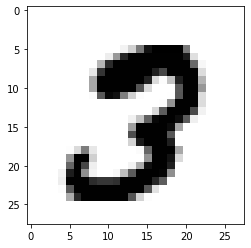

In [5]:
# extract the first image in x_train
idx = 12345
img = x_train[idx, :, :] # : means that we include all indices
print("Shape of the image:", img.shape)
plt.imshow(img, cmap=plt.cm.binary)

In [6]:
print("Shape of y_train:", y_train.shape)
y_train[idx]

Shape of y_train: (60000,)


3

In [8]:
import tensorflow.keras as K # A common abbrevation of the kera package.
# Build a neural network model by stacking layers.
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # convert a 28*28 matrix into a 784 1D array
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)                                   
])

In [20]:
# For each example the model returns a vector of "logits", one for each class.
index = 12345
predictions = model(x_train[index:(index+1)]).numpy()
print(predictions)

[[-0.002 -0.027 -0.539  1.222 -0.398  0.816 -1.1   -0.368 -0.107  0.357]]


In [21]:
# The tf.nn.softmax function converts these logits to probabilities for each class
probs = tf.nn.softmax(predictions).numpy()
print(probs)

[[0.082 0.08  0.048 0.277 0.055 0.185 0.027 0.057 0.073 0.117]]


In [22]:
# The converted list represents a probability distribution.
np.sum(probs)

1.0

In [23]:
# The model makes prediction based on the largest probability
class_prediction = np.argmax(probs)
print(class_prediction)

3


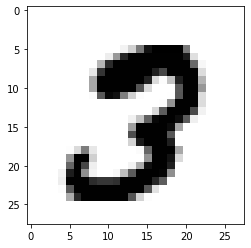

In [24]:
# Visualize this image
plt.imshow(x_train[index].reshape([28, 28]), cmap=plt.cm.binary)

The prediction accuracy is low, since no training has been performed yet. Let's introduce a function that measures the prediction error.

In [25]:
# Let's introduce a function that measures the prediction error.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[index:(index+1)], predictions).numpy()

1.2826464

In [26]:
# Set up the training environment
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [28]:
# The Model.fit method adjusts the model parameters to minimize the loss
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3981 - accuracy: 0.8833
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1010 - accuracy: 0.9687
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0624 - accuracy: 0.9808
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0485 - accuracy: 0.9841
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0372 - accuracy: 0.9882


In [29]:
# The above loss and accuracy is for the training data. Let's evaluate the model on the test set.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0694 - accuracy: 0.9780


[0.06944674998521805, 0.9779999852180481]

The image classifier is now trained to ~98% accuracy on this dataset. Let's create a test case ourselves. For example, we can use MS Paint to draw a digit. Remember to resize the canvas to 28*28 pixels

Upload the image to Colab environment by clicking the "Upload to Session Storage" button in the File tab on the left.

In [45]:
# import pillow for image transformation
import PIL
img = PIL.Image.open("test_img_2.png")
img = img.convert('1') # convert image to black and white
print(img.size)

(28, 28)


In [46]:
img

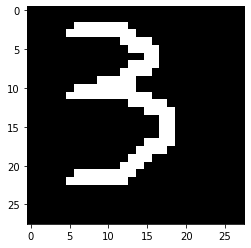

In [47]:
# What values are contained in img by default?
img_processed = np.asarray(img).astype(float)
plt.imshow(img_processed, cmap=plt.cm.binary)

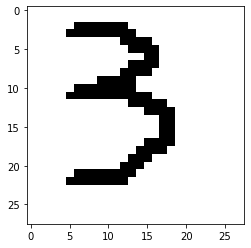

In [48]:
# Switch black and white values
img_np = 1 - np.asarray(img).astype(float)
plt.imshow(img_np, cmap=plt.cm.binary)

In [49]:
# Obtain predictions from the model
raw_prediction = model(img_np.reshape([-1, 28, 28]))
print(raw_prediction)

tf.Tensor(
[[ -3.499   0.8     2.583   3.045 -12.924  -2.394  -0.038  -6.423   1.66
   -6.836]], shape=(1, 10), dtype=float32)


In [50]:
# Convert the output into a numpy array
predictions = raw_prediction.numpy()
print(predictions)

[[ -3.499   0.8     2.583   3.045 -12.924  -2.394  -0.038  -6.423   1.66
   -6.836]]


In [51]:
# Convert the raw outputs (logits) into probabilities
probs = tf.nn.softmax(predictions).numpy()
print(probs)

[[0.001 0.052 0.309 0.491 0.    0.002 0.022 0.    0.123 0.   ]]


In [52]:
class_prediction = np.argmax(probs)
print(class_prediction)

3


In [53]:
# Show the confusion matrix
from sklearn.metrics import confusion_matrix

In [54]:
# y_test_pred = np.argmax(model(x_test).numpy())
y_test_pred = []
raw_predictions = model(x_test).numpy()
for row_idx in range(raw_predictions.shape[0]):
    logits = raw_predictions[row_idx, :]
    probs = tf.nn.softmax(logits).numpy()
    class_pred = np.argmax(probs)
    y_test_pred.append(class_pred)
print(y_test_pred)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [55]:
mat = confusion_matrix(y_test, y_test_pred)
print(mat)

[[ 973    0    0    0    2    0    0    1    4    0]
 [   1 1126    4    1    0    0    2    0    1    0]
 [   4    2 1015    3    1    0    1    3    1    2]
 [   0    0    5  991    0    6    0    4    2    2]
 [   2    0    1    1  949    0    4    3    0   22]
 [   2    0    0    8    1  874    3    1    1    2]
 [   5    2    0    0    7    7  935    0    2    0]
 [   0    3   11    5    2    1    0  999    0    7]
 [   7    1    3    8    3   10    1    4  933    4]
 [   3    2    0    5    4    2    0    6    2  985]]


# Exercise: Are larger models better?
Modify the neural network model in one of the following ways:
1. Increate the number of neurons from 128 to 256.
2. Add another layer of 128 nodes.
Report the accuracy and the confusion matrix on the test set.

